In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import Utils.dataframe as dataframe_helper
import Utils.learning as learning
import mlflow

In [3]:
experiment_name = "Behavior & Context (Eng) Model"

In [4]:
pd.set_option('display.max_columns', None)
mlflow.set_tracking_uri("../mlruns")
mlflow.set_experiment(experiment_name)

2023/01/05 02:11:07 INFO mlflow.tracking.fluent: Experiment with name 'Behavior & Context (Eng) Model' does not exist. Creating a new experiment.


<Experiment: artifact_location='../mlruns/638788250225574456', creation_time=1672859467125, experiment_id='638788250225574456', last_update_time=1672859467125, lifecycle_stage='active', name='Behavior & Context (Eng) Model', tags={}>

In [5]:
drop_columns = ['reviewID', 
                'reviewerID', 
                'restaurantID', 
                'date', 
                'name', 
                'location', 
                'yelpJoinDate',
                'restaurantRating',
                'usefulCount',
                'coolCount',
                'funnyCount',
                'complimentCount',
                'tipCount',
                'fanCount'
                ]

## Make train dataset

In [6]:
df = dataframe_helper.load_data()
df = dataframe_helper.data_cleaning(df)
# df.to_csv('../Data/clean_data.csv', index=False)
# df = pd.read_csv('../Data/clean_data.csv')
df = dataframe_helper.feature_engineering(df)


c:\Users\Um_25\Desktop\project\yelp-fake-reviews\Code\..\Utils\dataframe.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = df['date'][i][1:]
c:\Users\Um_25\Desktop\project\yelp-fake-reviews\Code\..\Utils\dataframe.py:231: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2['reviewerID'] = pd.Series([])
c:\Users\Um_25\Desktop\project\yelp-fake-reviews\Code\..\Utils\dataframe.py:232: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2['maximumContentSimilarity'] = pd.Series([])


In [7]:
under_sampled_df = dataframe_helper.under_sampling(df=df, target='flagged', big_sample='Y', small_sample='N')
train_under_sampled_df = under_sampled_df.drop(drop_columns, axis=1)

Under-Sampling Data
Under-Sampling Complete


In [8]:
over_sampled_df = dataframe_helper.over_sampling(df=df, target='flagged', big_sample='Y', small_sample='N')
train_over_sampled_df = over_sampled_df.drop(drop_columns, axis=1)

Over-Sampling Data
Over-Sampling Complete


In [9]:
train_df = df.drop(drop_columns, axis=1)

## Model

In [10]:
rf = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=14, max_features='auto', n_estimators=500)
nb = GaussianNB()

2023/01/05 02:12:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Training Random Forest Model


  0%|          | 0/15 [00:00<?, ?it/s]2023/01/05 02:12:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Um_25\AppData\Local\Programs\Python\Python39\lib\site-packages\mlflow\models\signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/01/05 02:12:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encount

----------------------------------------


 13%|█▎        | 2/15 [00:56<05:57, 27.50s/it]

----------------------------------------


 20%|██        | 3/15 [01:19<05:03, 25.28s/it]

----------------------------------------


 27%|██▋       | 4/15 [01:43<04:31, 24.70s/it]

----------------------------------------


 33%|███▎      | 5/15 [02:06<03:59, 23.98s/it]

----------------------------------------


 40%|████      | 6/15 [02:28<03:31, 23.55s/it]

----------------------------------------


 47%|████▋     | 7/15 [02:51<03:06, 23.35s/it]

----------------------------------------


 53%|█████▎    | 8/15 [03:16<02:45, 23.71s/it]

----------------------------------------


 60%|██████    | 9/15 [03:40<02:23, 23.93s/it]

----------------------------------------


 67%|██████▋   | 10/15 [04:04<01:59, 23.81s/it]

----------------------------------------


 73%|███████▎  | 11/15 [04:27<01:34, 23.68s/it]

----------------------------------------


 80%|████████  | 12/15 [04:50<01:10, 23.53s/it]

----------------------------------------


 87%|████████▋ | 13/15 [05:14<00:47, 23.51s/it]

----------------------------------------


 93%|█████████▎| 14/15 [05:37<00:23, 23.45s/it]

----------------------------------------


100%|██████████| 15/15 [06:00<00:00, 24.06s/it]

----------------------------------------


Random Forest Model Results
----------------------------------------
Accuracy Score : 0.8786350148367953
Precision Score : 0.7419974391805377
Recall Score : 0.7363405336721728
F1 Score : 0.739158163265306
Confusion Matrix : 
[[4763  403]
 [ 415 1159]]


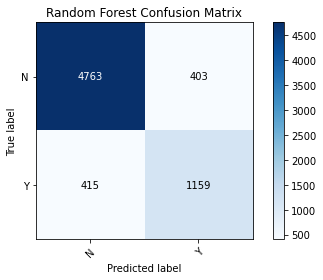

2023/01/05 02:18:03 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Training Naive Bayes Model


  7%|▋         | 1/15 [00:20<04:43, 20.24s/it]

----------------------------------------


 13%|█▎        | 2/15 [00:25<02:29, 11.52s/it]

----------------------------------------


 20%|██        | 3/15 [00:31<01:44,  8.70s/it]

----------------------------------------


 27%|██▋       | 4/15 [00:36<01:20,  7.27s/it]

----------------------------------------


 33%|███▎      | 5/15 [00:41<01:05,  6.54s/it]

----------------------------------------


 40%|████      | 6/15 [00:46<00:54,  6.06s/it]

----------------------------------------


 47%|████▋     | 7/15 [00:51<00:46,  5.76s/it]

----------------------------------------


 53%|█████▎    | 8/15 [00:56<00:38,  5.56s/it]

----------------------------------------


 60%|██████    | 9/15 [01:01<00:32,  5.45s/it]

----------------------------------------


 67%|██████▋   | 10/15 [01:06<00:26,  5.32s/it]

----------------------------------------


 73%|███████▎  | 11/15 [01:12<00:21,  5.30s/it]

----------------------------------------


 80%|████████  | 12/15 [01:17<00:15,  5.27s/it]

----------------------------------------


 87%|████████▋ | 13/15 [01:22<00:10,  5.24s/it]

----------------------------------------


 93%|█████████▎| 14/15 [01:27<00:05,  5.23s/it]

----------------------------------------


100%|██████████| 15/15 [01:33<00:00,  6.22s/it]

----------------------------------------
Naive Bayes Model Results
----------------------------------------
Accuracy Score : 0.6864985163204748
Precision Score : 0.4257371176632681
Recall Score : 0.9815756035578145
F1 Score : 0.5938881414568519
Confusion Matrix : 
[[3082 2084]
 [  29 1545]]


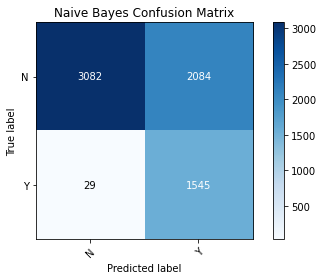

GaussianNB()

In [11]:
learning.semi_supervised_learning(train_df, experiment_name, df_type='normal', model=rf, threshold=0.7, iterations=15, algorithm='Random Forest', target_column ='flagged', log=True)
learning.semi_supervised_learning(train_df, experiment_name, df_type='normal', model=nb, threshold=0.7, iterations=15, algorithm='Naive Bayes', target_column ='flagged', log=True)

2023/01/05 02:19:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Training Random Forest Model


  7%|▋         | 1/15 [00:18<04:22, 18.72s/it]

----------------------------------------


 13%|█▎        | 2/15 [00:33<03:30, 16.18s/it]

----------------------------------------


 20%|██        | 3/15 [00:47<03:05, 15.45s/it]

----------------------------------------


 27%|██▋       | 4/15 [01:02<02:47, 15.25s/it]

----------------------------------------


 33%|███▎      | 5/15 [01:16<02:29, 14.92s/it]

----------------------------------------


 40%|████      | 6/15 [01:31<02:12, 14.70s/it]

----------------------------------------


 47%|████▋     | 7/15 [01:45<01:56, 14.58s/it]

----------------------------------------


 53%|█████▎    | 8/15 [01:59<01:40, 14.42s/it]

----------------------------------------


 60%|██████    | 9/15 [02:13<01:25, 14.30s/it]

----------------------------------------


 67%|██████▋   | 10/15 [02:27<01:11, 14.24s/it]

----------------------------------------


 73%|███████▎  | 11/15 [02:41<00:56, 14.19s/it]

----------------------------------------


 80%|████████  | 12/15 [02:55<00:42, 14.15s/it]

----------------------------------------


 87%|████████▋ | 13/15 [03:10<00:28, 14.17s/it]

----------------------------------------


 93%|█████████▎| 14/15 [03:24<00:14, 14.09s/it]

----------------------------------------


100%|██████████| 15/15 [03:38<00:00, 14.54s/it]

----------------------------------------


Random Forest Model Results
----------------------------------------
Accuracy Score : 0.8752819851756365
Precision Score : 0.8316478286734087
Recall Score : 0.9307589880159787
F1 Score : 0.8784165881244109
Confusion Matrix : 
[[1318  283]
 [ 104 1398]]


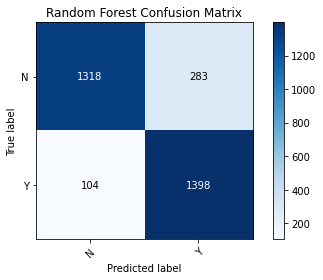

2023/01/05 02:23:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Training Naive Bayes Model


  7%|▋         | 1/15 [00:09<02:13,  9.52s/it]

----------------------------------------


 13%|█▎        | 2/15 [00:13<01:23,  6.45s/it]

----------------------------------------


 20%|██        | 3/15 [00:18<01:06,  5.51s/it]

----------------------------------------


 27%|██▋       | 4/15 [00:22<00:55,  5.04s/it]

----------------------------------------


 33%|███▎      | 5/15 [00:26<00:47,  4.76s/it]

----------------------------------------


 40%|████      | 6/15 [00:31<00:41,  4.61s/it]

----------------------------------------


 47%|████▋     | 7/15 [00:35<00:35,  4.46s/it]

----------------------------------------


 53%|█████▎    | 8/15 [00:39<00:30,  4.40s/it]

----------------------------------------


 60%|██████    | 9/15 [00:43<00:26,  4.39s/it]

----------------------------------------


 67%|██████▋   | 10/15 [00:48<00:21,  4.40s/it]

----------------------------------------


 73%|███████▎  | 11/15 [00:52<00:17,  4.37s/it]

----------------------------------------


 80%|████████  | 12/15 [00:56<00:13,  4.34s/it]

----------------------------------------


 87%|████████▋ | 13/15 [01:01<00:08,  4.32s/it]

----------------------------------------


 93%|█████████▎| 14/15 [01:06<00:04,  4.53s/it]

----------------------------------------


100%|██████████| 15/15 [01:10<00:00,  4.70s/it]

----------------------------------------
Naive Bayes Model Results
----------------------------------------
Accuracy Score : 0.7853689977441186
Precision Score : 0.698292220113852
Recall Score : 0.9800266311584553
F1 Score : 0.8155124653739612
Confusion Matrix : 
[[ 965  636]
 [  30 1472]]


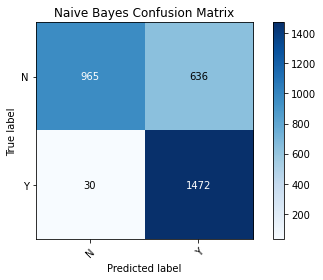

GaussianNB()

In [12]:
learning.semi_supervised_learning(train_under_sampled_df, experiment_name, df_type='under_sampled', model=rf, threshold=0.7, iterations=15, algorithm='Random Forest', target_column ='flagged', log=True)
learning.semi_supervised_learning(train_under_sampled_df, experiment_name, df_type='under_sampled', model=nb, threshold=0.7, iterations=15, algorithm='Naive Bayes', target_column ='flagged', log=True)

2023/01/05 02:24:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Training Random Forest Model


  7%|▋         | 1/15 [00:53<12:27, 53.37s/it]

----------------------------------------


 13%|█▎        | 2/15 [01:25<08:48, 40.66s/it]

----------------------------------------


 20%|██        | 3/15 [01:56<07:18, 36.52s/it]

----------------------------------------


 27%|██▋       | 4/15 [02:27<06:18, 34.38s/it]

----------------------------------------


 33%|███▎      | 5/15 [02:59<05:33, 33.35s/it]

----------------------------------------


 40%|████      | 6/15 [03:35<05:07, 34.16s/it]

----------------------------------------


 47%|████▋     | 7/15 [04:07<04:29, 33.67s/it]

----------------------------------------


 53%|█████▎    | 8/15 [04:40<03:53, 33.35s/it]

----------------------------------------


 60%|██████    | 9/15 [05:12<03:18, 33.10s/it]

----------------------------------------


 67%|██████▋   | 10/15 [05:46<02:46, 33.36s/it]

----------------------------------------


 73%|███████▎  | 11/15 [06:26<02:20, 35.21s/it]

----------------------------------------


 80%|████████  | 12/15 [06:59<01:43, 34.46s/it]

----------------------------------------


 87%|████████▋ | 13/15 [07:31<01:07, 33.96s/it]

----------------------------------------


 93%|█████████▎| 14/15 [08:04<00:33, 33.61s/it]

----------------------------------------


100%|██████████| 15/15 [08:37<00:00, 34.49s/it]

----------------------------------------


Random Forest Model Results
----------------------------------------
Accuracy Score : 0.9140323824209715
Precision Score : 0.8789529163738581
Recall Score : 0.9610065309258548
F1 Score : 0.9181501192879428
Confusion Matrix : 
[[4481  689]
 [ 203 5003]]


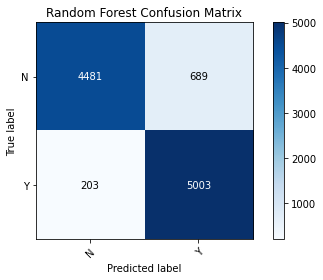

2023/01/05 02:33:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Training Naive Bayes Model


  7%|▋         | 1/15 [00:36<08:35, 36.83s/it]

----------------------------------------


 13%|█▎        | 2/15 [00:42<04:03, 18.73s/it]

----------------------------------------


 20%|██        | 3/15 [00:48<02:32, 12.75s/it]

----------------------------------------


 27%|██▋       | 4/15 [00:54<01:48,  9.89s/it]

----------------------------------------


 33%|███▎      | 5/15 [01:00<01:25,  8.54s/it]

----------------------------------------


 40%|████      | 6/15 [01:06<01:08,  7.64s/it]

----------------------------------------


 47%|████▋     | 7/15 [01:11<00:55,  6.97s/it]

----------------------------------------


 53%|█████▎    | 8/15 [01:17<00:45,  6.54s/it]

----------------------------------------


 60%|██████    | 9/15 [01:22<00:37,  6.24s/it]

----------------------------------------


 67%|██████▋   | 10/15 [01:28<00:30,  6.02s/it]

----------------------------------------


 73%|███████▎  | 11/15 [01:34<00:23,  5.93s/it]

----------------------------------------


 80%|████████  | 12/15 [01:40<00:18,  6.10s/it]

----------------------------------------


 87%|████████▋ | 13/15 [01:46<00:11,  5.98s/it]

----------------------------------------


 93%|█████████▎| 14/15 [01:51<00:05,  5.84s/it]

----------------------------------------


100%|██████████| 15/15 [01:57<00:00,  7.83s/it]

----------------------------------------
Naive Bayes Model Results
----------------------------------------
Accuracy Score : 0.7970316114109484
Precision Score : 0.717026043125175
Recall Score : 0.9836726853630426
F1 Score : 0.8294460641399417
Confusion Matrix : 
[[3149 2021]
 [  85 5121]]


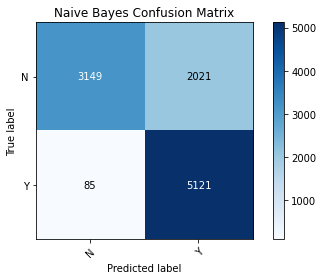

GaussianNB()

In [13]:
learning.semi_supervised_learning(train_over_sampled_df, experiment_name, df_type='over_sampled', model=rf, threshold=0.7, iterations=15, algorithm='Random Forest', target_column ='flagged', log=True)
learning.semi_supervised_learning(train_over_sampled_df, experiment_name, df_type='over_sampled', model=nb, threshold=0.7, iterations=15, algorithm='Naive Bayes', target_column ='flagged', log=True)